# 8장. 선형 회귀 모델

In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow.keras import optimizers

## 8.1 예측 모델과 손실함수

In [2]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
y_train = 0.5 * x_train + 1.0 + 0.4 * np.random.rand(len(x_train))
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

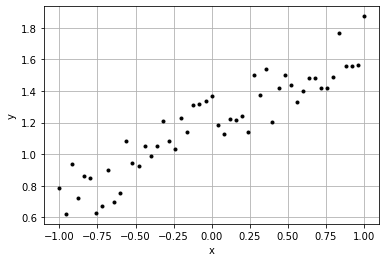

In [3]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.ones([1,1])) # 기울기
        self.b = tf.Variable(tf.ones([1])) # y 절편

    def call(self, x): # x: 데이터 x 좌표
        return tf.matmul(x, self.w) + self.b

In [5]:
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

In [6]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
optimizer = optimizers.SGD(lr)

## 8.2 결정론적 방법과 스토캐스틱 방법
### 8.2.1 결정론적 방법

In [7]:
for epoch in range(MaxEpoch):
    with tf.GradientTape() as tape:
        curr_loss = loss(y_train, model(x_train))
        gradients = tape.gradient(curr_loss, model.trainable_variables)
        if epoch % 5 == 0:
            print(model.w.numpy(), model.b.numpy(), curr_loss.numpy())
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

[[1.]] [1.] 0.14998727
[[0.6727577]] [1.1888978] 0.028191052
[[0.54642326]] [1.1948009] 0.015662618
[[0.49765092]] [1.1949854] 0.013800872
[[0.478822]] [1.1949911] 0.013523399


In [8]:
from matplotlib.patches import Rectangle
def visualize_l2(w, b, features, x_train, y_train):
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, np.matmul(features, w) + b, '--k')
    currentAxis = plt.gca()
    for ff, xx,yy in zip(features, x_train, y_train):
        error = np.matmul(ff, w) + b - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('w={:1.2f}, b={:1.2f}'.format(w[0][0],b[0]))

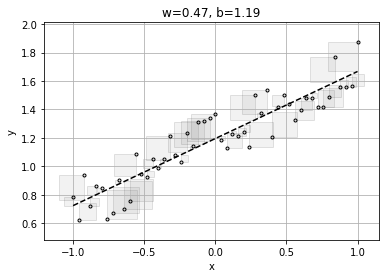

In [9]:
visualize_l2(model.w.numpy(), model.b.numpy(), x_train, x_train, y_train)

### 8.2.2 스토캐스틱 방법

In [10]:
# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = x_train[shuffled_id]
shuffled_y_train = y_train[shuffled_id]

In [11]:
model = MyModel()

MaxEpoch = 25
lr = 0.25
optimizer = optimizers.SGD(lr)
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

# 스토캐스틱 방법
def generate_batches(batch_size, features, labels):
    outout_batches = []
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

batch_size = 5
for epoch in range(MaxEpoch):

    if epoch % 5 == 0:
        curr_loss = loss(y_train, model(x_train))
        print(model.w.numpy(), model.b.numpy(), curr_loss.numpy())

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

[[1.]] [1.] 0.14998727
[[0.4888436]] [1.1834033] 0.0137747675
[[0.48882985]] [1.1833994] 0.013774646
[[0.48882985]] [1.1833994] 0.013774646
[[0.48882985]] [1.1833994] 0.013774646


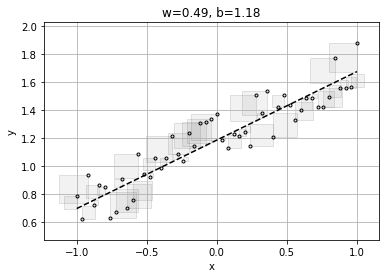

In [12]:
visualize_l2(model.w.numpy(), model.b.numpy(), x_train, x_train, y_train)

## 8.3 비선형회귀 모델
### 8.3.1 이차 곡선 데이터

In [13]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**2 + 0.25 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

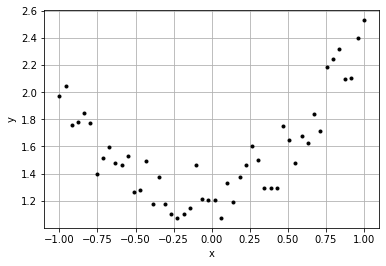

In [14]:
# 분포도
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
# 특성값 정의
features = np.array([[xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [16]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.ones([2,1])) 
        self.b = tf.Variable(tf.ones([1])) 

    def call(self, x): # x: 특성값 벡터
        return tf.matmul(x, self.w) + self.b

In [17]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
batch_size = 10
optimizer = optimizers.SGD(lr)
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

In [18]:
# 스토캐스틱 방법
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

for epoch in range(MaxEpoch):
    if epoch % 5 == 0:
        curr_loss = loss(labels, model(features))
        print(model.w.numpy().T, model.b.numpy(), curr_loss.numpy())

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

[[1. 1.]] [1.] 0.27033687
[[1.076062   0.23619145]] [1.1704177] 0.01800622
[[1.0612648  0.23138306]] [1.1769375] 0.017824525
[[1.0563606  0.23150261]] [1.1790168] 0.01777821
[[1.0547771  0.23155314]] [1.1796877] 0.017764315


/Users/dongwook/opt/anaconda3/envs/tfopt/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


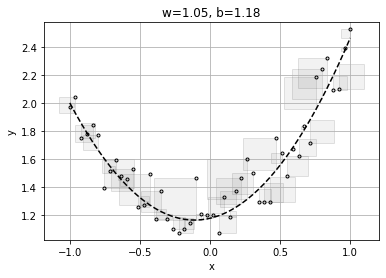

In [19]:
visualize_l2(model.w.numpy(), model.b.numpy(), features, x_train, labels)

/Users/dongwook/opt/anaconda3/envs/tfopt/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


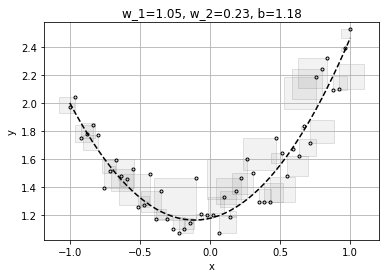

In [20]:
def visualize_l2(w, b, features, x_train, y_train):
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, np.matmul(features, w) + b, '--k')
    currentAxis = plt.gca()
    for ff, xx,yy in zip(features, x_train, y_train):
        error = np.matmul(ff, w) + b - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error[0], error[0],
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('w_1={:1.2f}, w_2={:1.2f}, b={:1.2f}'.format(w[0][0],w[1][0],b[0]))

visualize_l2(model.w.numpy(), model.b.numpy(), features, x_train, labels)

### 8.3.2 삼차 곡선 데이터

In [21]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**3 + 0.1 * x_train**2  -0.15 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

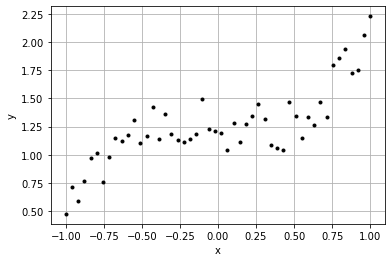

In [22]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
# 특성값 정의
features = np.array([[xval**3, xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [24]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.ones([3,1])) 
        self.b = tf.Variable(tf.ones([1])) 

    def call(self, x): 
        return tf.matmul(x, self.w) + self.b

In [25]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
batch_size = 10
optimizer = optimizers.SGD(lr)
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

In [26]:
# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
for epoch in range(MaxEpoch):
    if epoch % 5 == 0:
        curr_loss = loss(labels, model(features))
        print(model.w.numpy().T, model.b.numpy(), curr_loss.numpy())

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

[[1. 1. 1.]] [1.] 0.57014674
[[0.5752581  0.42941982 0.10803683]] [1.0714246] 0.031893898
[[0.6731134  0.24562356 0.04974759]] [1.1476407] 0.021883728
[[0.7469721  0.18626072 0.00303176]] [1.1714399] 0.019629695
[[ 0.80405676  0.16686103 -0.03414323]] [1.1785893] 0.018755484


/Users/dongwook/opt/anaconda3/envs/tfopt/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


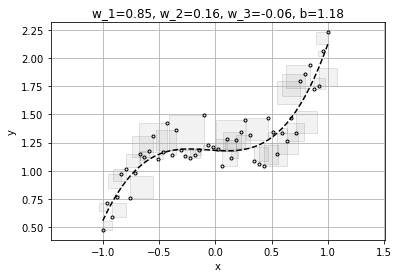

In [27]:
def visualize_l2(w, b, features, x_train, y_train):
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, np.matmul(features, w) + b, '--k')
    currentAxis = plt.gca()
    for ff, xx,yy in zip(features, x_train, y_train):
        error = np.matmul(ff, w) + b - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('w_1={:1.2f}, w_2={:1.2f}, w_3={:1.2f}, b={:1.2f}'.format(w[0][0],w[1][0],w[2][0],b[0]))
    
visualize_l2(model.w.numpy(), model.b.numpy(), features, x_train, labels)

### 8.3.3 삼각함수 곡선 데이터

In [28]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = 0.25 * np.cos(np.pi * x_train) + 0.3 * np.sin(np.pi * x_train) + 0.2 * (2 * np.random.rand(len(x_train)) - 1)

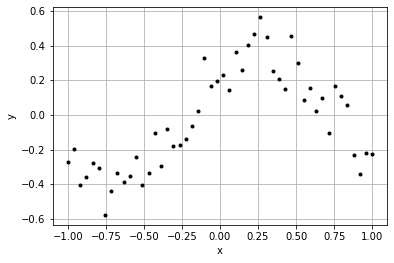

In [29]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [30]:
# 특성값 정의
features = np.array([[np.cos(np.pi * xval), np.sin(np.pi * xval)] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [31]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.ones([2,1])) 
        self.b = tf.Variable(tf.ones([1])) 

    def call(self, x): 
        return tf.matmul(x, self.w) + self.b

In [32]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
batch_size = 10
optimizer = optimizers.SGD(lr)
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

In [33]:
# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
for epoch in range(MaxEpoch):
    if epoch % 5 == 0:
        curr_loss = loss(labels, model(features))
        print(model.w.numpy().T, model.b.numpy(), curr_loss.numpy())

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

[[1. 1.]] [1.] 1.5639328
[[0.23110393 0.2858727 ]] [-0.03948181] 0.011384334
[[0.23096296 0.28525737]] [-0.0394916] 0.01139001
[[0.23096305 0.28525692]] [-0.03949159] 0.011390012
[[0.23096305 0.28525692]] [-0.03949159] 0.011390012


/Users/dongwook/opt/anaconda3/envs/tfopt/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


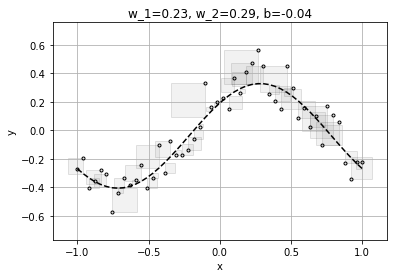

In [34]:
def visualize_l2(w, b, features, x_train, y_train):
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, np.matmul(features, w) + b, '--k')
    currentAxis = plt.gca()
    for ff, xx,yy in zip(features, x_train, y_train):
        error = np.matmul(ff, w) + b - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error[0], error[0],
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('w_1={:1.2f}, w_2={:1.2f}, b={:1.2f}'.format(w[0][0],w[1][0],b[0]))
    
visualize_l2(model.w.numpy(), model.b.numpy(), features, x_train, labels)

#### 4차 함수 특성값

In [35]:
# 특성값 정의
features = np.array([[xval**4, xval**3, xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [36]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.ones([4,1])) 
        self.b = tf.Variable(tf.ones([1])) 

    def call(self, x): 
        return tf.matmul(x, self.w) + self.b

In [37]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 100
lr = 0.25
batch_size = 10
optimizer = optimizers.SGD(lr)
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

In [38]:
# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
for epoch in range(MaxEpoch):
    if epoch % 5 == 0:
        curr_loss = loss(labels, model(features))
        print(model.w.numpy().T, model.b.numpy(), curr_loss.numpy())

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

[[1. 1. 1. 1.]] [1.] 3.8419266
[[-0.01998943  0.10948318 -0.289248    0.14670521]] [0.01788581] 0.04713515
[[-0.06305835 -0.08681587 -0.40492234  0.28358412]] [0.08830515] 0.032264695
[[-0.03677574 -0.24476065 -0.44762403  0.3895495 ]] [0.10325572] 0.025754742
[[-0.00322599 -0.3695835  -0.4794799   0.4726162 ]] [0.11025932] 0.021716183
[[ 0.0295804  -0.46790263 -0.50872815  0.5379233 ]] [0.11568157] 0.019103907
[[ 0.06073498 -0.5453056  -0.53650194  0.58928937]] [0.12044956] 0.01737817
[[ 0.09024286 -0.6062396  -0.56299835  0.6296898 ]] [0.12475689] 0.016212814
[[ 0.1182123  -0.6542108  -0.5882898   0.66146207]] [0.12868632] 0.015405311
[[ 0.14475133 -0.6919799  -0.6124309   0.68644536]] [0.13229492] 0.014828888
[[ 0.1699565  -0.72171926 -0.6354723   0.70608675]] [0.13562754] 0.014403787
[[ 0.19391353 -0.74513876 -0.6574626   0.7215252 ]] [0.1387203] 0.014079585
[[ 0.21669915 -0.7635837  -0.6784488   0.73365676]] [0.14160277] 0.013824154
[[ 0.23838232 -0.77811325 -0.6984757   0.7431867

/Users/dongwook/opt/anaconda3/envs/tfopt/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


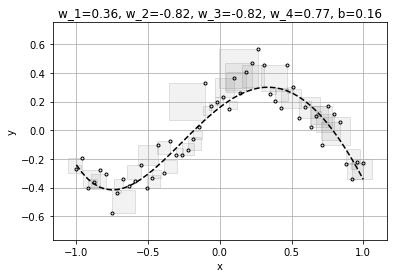

In [39]:
def visualize_l2(w, b, features, x_train, y_train):
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, np.matmul(features, w) + b, '--k')
    currentAxis = plt.gca()
    for ff, xx,yy in zip(features, x_train, y_train):
        error = np.matmul(ff, w) + b - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('w_1={:1.2f}, w_2={:1.2f}, w_3={:1.2f}, w_4={:1.2f}, b={:1.2f}'.format(w[0][0],w[1][0],w[2][0],w[3][0],b[0]))

visualize_l2(model.w.numpy(), model.b.numpy(), features, x_train, labels)